In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv('insurance.csv')

df.shape

(1338, 7)

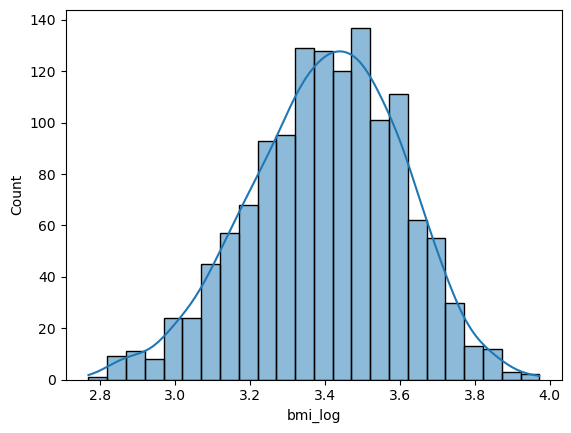

In [6]:
df['bmi_log'] = np.log(df['bmi'])

sns.histplot(data=df,x='bmi_log', kde=True);
# plt.show()
# sns.boxplot(data=data,x='Price')
# plt.show()

8798.593
9294.131949999999
8965.79575
10057.652025


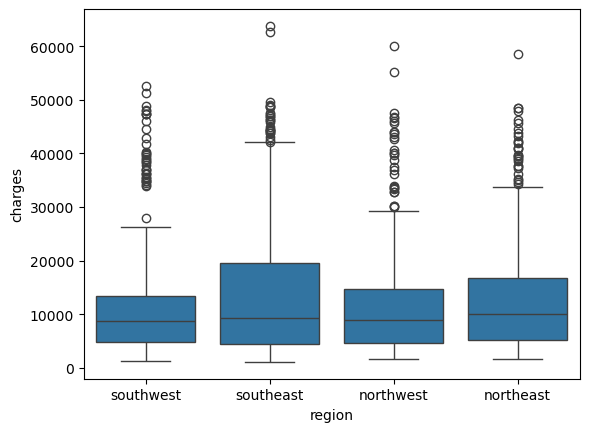

In [19]:
sns.boxplot(data=df, y='charges', x='region');
regions = ['southwest', 'southeast', 'northwest', 'northeast']

#filtered_df = df[df['Age'] > 25]
sw_df = df[df['region'] == 'southwest']
sw_mean = sw_df['charges'].median()

se_df = df[df['region'] == 'southeast']
se_mean = se_df['charges'].median()

nw_df = df[df['region'] == 'northwest']
nw_mean = nw_df['charges'].median()

ne_df = df[df['region'] == 'northeast']
ne_mean = ne_df['charges'].median()


print(sw_mean)
print(se_mean)
print(nw_mean)
print(ne_mean)


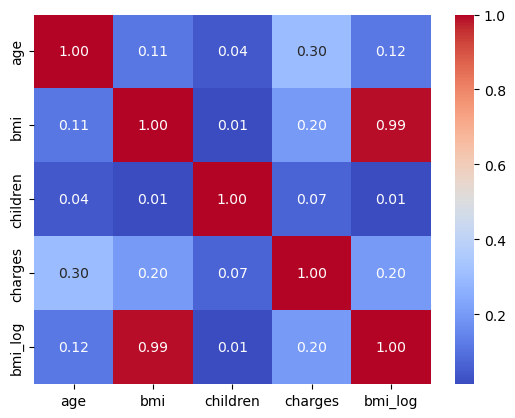

In [16]:
sns.heatmap(df.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='coolwarm');

In [17]:
# creating one-hot encoded (also called dummy) variables
X_encoded = pd.get_dummies(df[['sex', 'smoker', 'region']], drop_first=True)
print(X_encoded)

      sex_male  smoker_yes  region_northwest  region_southeast  \
0        False        True             False             False   
1         True       False             False              True   
2         True       False             False              True   
3         True       False              True             False   
4         True       False              True             False   
...        ...         ...               ...               ...   
1333      True       False              True             False   
1334     False       False             False             False   
1335     False       False             False              True   
1336     False       False             False             False   
1337     False        True              True             False   

      region_southwest  
0                 True  
1                False  
2                False  
3                False  
4                False  
...                ...  
1333             False  
1334   

In [18]:
df = df.drop('bmi_log', axis=1)

In [27]:
X = df['age']
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X,    # specifying the independent variables
    y,    # specifying the dependent variable
    test_size=0.20,    # specifying the size of the test set as a fraction of the whole data
    random_state=1    # specifying a seed value to enable reproducible results
)

X_test.shape

(268,)

In [28]:
# creating an instance of the linear regression model
model = LinearRegression()

# fitting the model to the training data
model.fit(X_train, y_train)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.